Scipy : <br>
We have the min and max temperatures in a city In India for each months of the year. <br>
We would like to find a function to describe this and show it graphically, the dataset
given below.<br> <br>
Task:<br><br>
1.fitting it to the periodic function<br>
2.plot the fit <br><br>
Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25<br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)

In [7]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

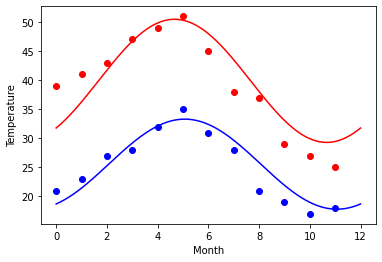

In [8]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.show()

Matplotlib:<br>
This assignment is for visualization using matplotlib:<br>
data to use:<br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

In [9]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8e30d6df0>],
      dtype=object)

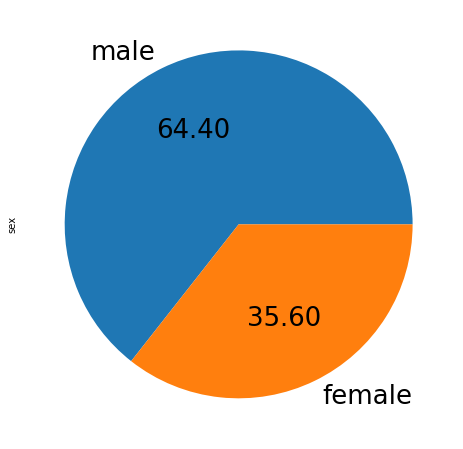

In [10]:
titanic['sex'].value_counts().plot.pie(subplots=True, figsize=(8,8), fontsize=26, autopct='%.2f')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

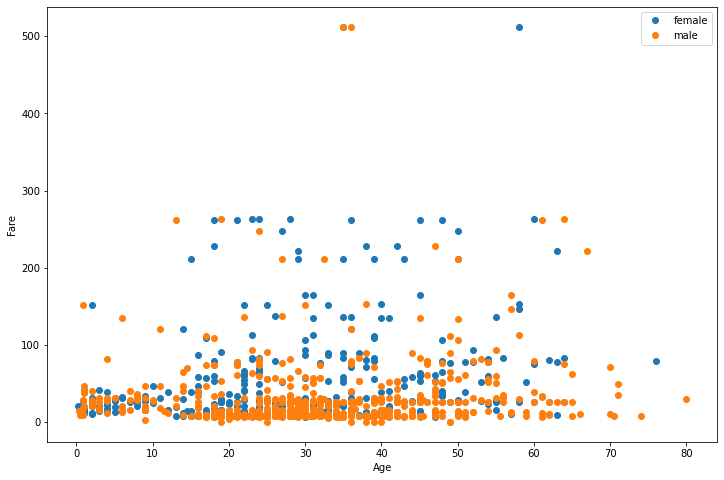

In [30]:
groups = titanic.groupby("sex")
plt.figure(figsize=(12,8))
for name, group in groups:
    plt.plot(group["age"], group["fare"], marker="o", linestyle="", label=name)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()